<a href="https://colab.research.google.com/github/mukul-mschauhan/linear-regression/blob/main/SL_In_Class_Lab_Exercise_(DAY_4)_Questions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table align="center" width=100%>
    <tr>
        <td width="20%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 4)
                    </b>
                </font>
            </div>
        </td>
         <td width="25%">
            <img src="GL-2.png">
        </td>
    </tr>
</table>

### About the data set (White wine data)

The dataset contains information about several health and economic factors that contribute to average life expectancy for different countries. <br> Attribute information:

**Fixed_Acidity:** The ph value for titrable acid content (0-7)

**Volatile_Acidity:** Measure of acidity due to bacteria

**Citric_Acid:** Amount of citric acid present in wine

**Residual_Sugar:** Amount of grape sugar in gms/litre

**Chlorides:** Amount of chlorides present in wine

**Free_Sulfur-dioxide:** Amount of SO2 that is not bound to other molecules

**Total_Sulfur-dioxide:** Portion of SO2 that is free in the wine plus the portion that is bound to other chemicals in the wine

**Density:** Density of wine (gms/cm<sup>3</sup>)

**pH:** The pH value of wine (0-14)

**Sulphates:** Amount of salts of sulphuric acid

**Alcohol:** Alcohol content in percentage

**Quality:** Wine quality

## Table of Content

1. **[Feature Engineering](#fe)**
3. **[Model Performance](#mp)**
3. **[Gradient Descent](#gd)**

**Import the required libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

#### Load the first dataset and check the first two observations

In [4]:
# Write code here
wine = pd.read_csv("/content/winequality-white.csv", delimiter=";")

wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Let's begin with some hands-on practice exercises

<a id="fe"> </a>
## 1. Feature Engineering

## We shall use the wine quality dataset

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Does the variable 'volatile acidity' need transformation ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

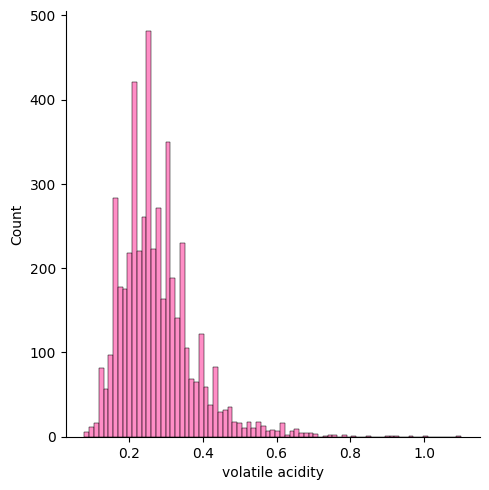

1.5769795029952025
5.091625816866611


In [11]:
# Write code here

# Distplot

sns.displot(x = "volatile acidity", data = wine, color = "hotpink")
plt.show()
print(wine["volatile acidity"].skew())
print(wine["volatile acidity"].kurt())

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. How can we reduce skewness of variable 'Residual_Sugar'?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [14]:
# Write code here
# Check the Skewness

print(wine["residual sugar"].skew())
print(wine["residual sugar"].kurt())

# Remove the Skewness
print(np.log(wine["residual sugar"]).skew())
print(np.log(wine["residual sugar"]).kurt())


1.0770937564240868
3.4698201025634265
-0.1611568975182972
-1.3523464790885065


In [15]:
import scipy.stats as stats

wine["Residual_Transform"], lambda_vals =  \
stats.boxcox(wine["residual sugar"])

In [17]:
print(wine["Residual_Transform"].skew())
print(wine["Residual_Transform"].kurt())

-0.05191707089488548
-1.3391850497825837


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Are there features in the dataset that add little to no information ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [18]:
# Write code here

# We will check for std = 0. If a column has std = 0 then
# it is considered adding no information to the model

wine.std()

,0
fixed acidity,0.843868
volatile acidity,0.100795
citric acid,0.121020
residual sugar,5.072058
chlorides,0.021848
free sulfur dioxide,17.007137
total sulfur dioxide,42.498065
density,0.002991
pH,0.151001
sulphates,0.114126


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Which transformation method is best suited to treat the skewness in variable 'alcohol'?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [25]:
# Write code here
print("Before Transformation")
print(f"Skewness: {wine['alcohol'].skew()}")
print(f"Kurtosis: {wine['alcohol'].kurt()}")

# Log, Sqrt, Reciprocal, Boxcox,...
print("After Log Transformation\n")
print(f"Skewness: {np.log(wine['alcohol']).skew()}")
print(f"Kurtosis: {np.log(wine['alcohol']).kurt()}")

print("After SQRT Transformation\n")
print(f"Skewness: {np.sqrt(wine['alcohol']).skew()}")
print(f"Kurtosis: {np.sqrt(wine['alcohol']).kurt()}")

print("After Reciprocal Transformation\n")
print(f"Skewness: {np.reciprocal(wine['alcohol']).skew()}")
print(f"Kurtosis: {np.reciprocal(wine['alcohol']).kurt()}")

Before Transformation
Skewness: 0.4873419932161276
Kurtosis: -0.6984253277895518
After Log Transformation

Skewness: 0.310134622964236
Kurtosis: -0.8960773956413668
After SQRT Transformation

Skewness: 0.39789094275901415
Kurtosis: -0.8087194386672483
After Reciprocal Transformation

Skewness: -0.13935230629934497
Kurtosis: -1.0068646023252144


In [35]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='box-cox')

print(stats.skew(pt.fit_transform(pd.DataFrame(wine["alcohol"]))))
pd.DataFrame((pt.fit_transform(pd.DataFrame(wine["alcohol"])))).kurt()

# Boxcox transformation is better for Alcohol....

[0.05927791]


,0
0,-1.031626


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Does scaling the feature 'pH' lead to better prediction when considering a full model ?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [38]:
# Write code here
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

df = wine.copy()

X = df.drop("quality", axis = 1)
y = df["quality"]

np.mean(cross_val_score(estimator = lr,
                X = X, y = y, cv = 5, scoring = "r2"))

0.24474083869342445

In [43]:
# After scaling

def scale(x):
  num = x - np.mean(x)
  deno = np.std(x)
  return(num/deno)

newX = df.drop("quality", axis = 1)
df["pH"] = scale(df["pH"])

In [45]:
np.mean(cross_val_score(estimator = lr,
                X = newX, y = y, cv = 5, scoring = "r2"))

0.24474083869343116

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. What could be done to resolve the issue of multicollinearity if present?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [63]:
# Write code here
#wine.corr()[wine.corr()>0.50]
# Since we know that there are variables that are highly collinear...
# We will apply VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

X = X.drop("density", axis = 1)

vif = pd.DataFrame()
vif["Features"] = X.select_dtypes(include = np.number).columns

vif["VIF"] = [variance_inflation_factor(X.values, i)\
              for i in range(X.shape[1])]

In [64]:
vif.sort_values(ascending = False, by = "VIF")

# In VIF Table, anything greater than 10 is high VIF and should be removed...


,Features,VIF
7,pH,160.307443
9,alcohol,104.876155
0,fixed acidity,58.358847
10,Residual_Transform,33.030053
3,residual sugar,25.900413
6,total sulfur dioxide,25.392874
8,sulphates,20.558325
2,citric acid,10.038188
1,volatile acidity,9.708086
5,free sulfur dioxide,9.217252


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Does the transformation of variable 'citric acid' affect the performance of prediction model?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# Write code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Fit a full model. Check whether variable has linear relationship with the wine quality<br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# Write code here

# pairplot....

<a id="mp"> </a>
## 2. Model Performance

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9.Using the SKLEARN library, Fit a full model on 70% of the given data and calculate the mean square error and the root mean square error for both train and test sets.<br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [65]:
# Write code here
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.30,
                                                random_state = 42)
lr = LinearRegression()

pred_train = lr.fit(xtrain, ytrain).predict(xtrain)
pred_test = lr.fit(xtrain, ytrain).predict(xtest)

rmse_train = root_mean_squared_error(ytrain, pred_train)
rmse_test = root_mean_squared_error(ytest, pred_test)

print(f"RMSE Train: {rmse_train}")
print(f"RMSE Test: {rmse_test}")

RMSE Train: 0.7570571978515649
RMSE Test: 0.7484573920330395


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> 10. Using the previous model built in the 9th Question, Calculate the MAE and the MAPE for the test set.<br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [68]:
# Write code here

def mae(yi, yhat, n):
  return(np.sum(np.abs(yi-yhat))/n)

print(f"MAE {mae(ytest, pred_test, len(ytest))}")

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(ytest, pred_test))

MAE 0.5819481693350088
0.5819481693350088


In [70]:
# MAPE
def mape(y, yhat, n):
  return(np.sum(np.abs((y-yhat)/y))/n)

print(f"MAPE: {mape(ytest, pred_test, len(ytest))}")

from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(ytest, pred_test)

MAPE: 0.10248631680071


0.10248631680071

<a id="gd"> </a>
## 3. Gradient Descent

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> 11.Using the SKLEARN library, build the stochastic gradient descent model and check score for both sets and see if the model seems underfit or overfit. Before building the model, scale the data<br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [75]:
# Write code here

from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor(learning_rate = 'constant', penalty='l1',
                   alpha=0.01,early_stopping = True,
                   random_state = 42)

pred_train = sgd.fit(xtrain, ytrain).predict(xtrain)
pred_test = sgd.fit(xtrain, ytrain).predict(xtest)

rmse_train = root_mean_squared_error(ytrain, pred_train)
rmse_test = root_mean_squared_error(ytest, pred_test)

print(f"RMSE Train: {rmse_train}")
print(f"RMSE Test: {rmse_test}")

RMSE Train: 198814786039884.4
RMSE Test: 200111454332327.75


In [77]:
# After Scaling

def scale(x):
  num = x - np.mean(x)
  deno = np.std(x)
  return(num/deno)

scaled_xtrain = scale(xtrain)
scaled_xtest = scale(xtest)

In [80]:
sgd = SGDRegressor(early_stopping = True,
                   random_state = 42)

pred_train = sgd.fit(scaled_xtrain, ytrain).predict(scaled_xtrain)
pred_test = sgd.predict(scaled_xtest)

rmse_train = root_mean_squared_error(ytrain, pred_train)
rmse_test = root_mean_squared_error(ytest, pred_test)

print(f"RMSE Train: {rmse_train}")
print(f"RMSE Test: {rmse_test}")

RMSE Train: 518086266774605.9
RMSE Test: 508721642918161.1


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> 12. Compare SGD model with LR_model from the 9th question. Compare them based RMSE, MSE, MAE, and MAPE<br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# Write code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> 13. Build the SGD model using the below features and compare the RMSE score of this model with the full GSD model built in question number 11.<br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

['fixed acidity', 'volatile acidity','total sulfur dioxide', 'density','pH', 'sulphates']

In [ ]:
# Write code here